In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from  sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df=pd.read_csv("./cluster-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#we can remove name because it is unique
X=df.drop("name",axis=1)
X=pd.get_dummies(X,drop_first=True)
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [4]:
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(X)
scaler_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 1.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 1.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 1.        , 0.        ,
        1.        ]])

In [5]:
scaler_df=pd.DataFrame(data=scaler_data,columns=X.columns)
scaler_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0


<AxesSubplot:>

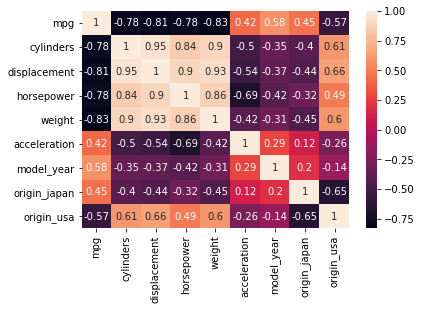

In [6]:
sbn.heatmap(scaler_df.corr(),annot=True)

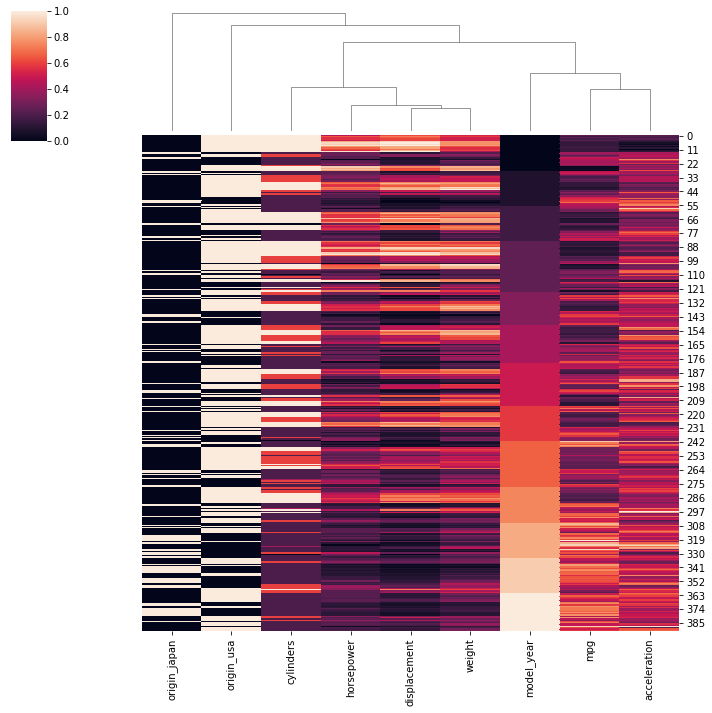

In [7]:
sbn.clustermap(scaler_df,row_cluster=False);

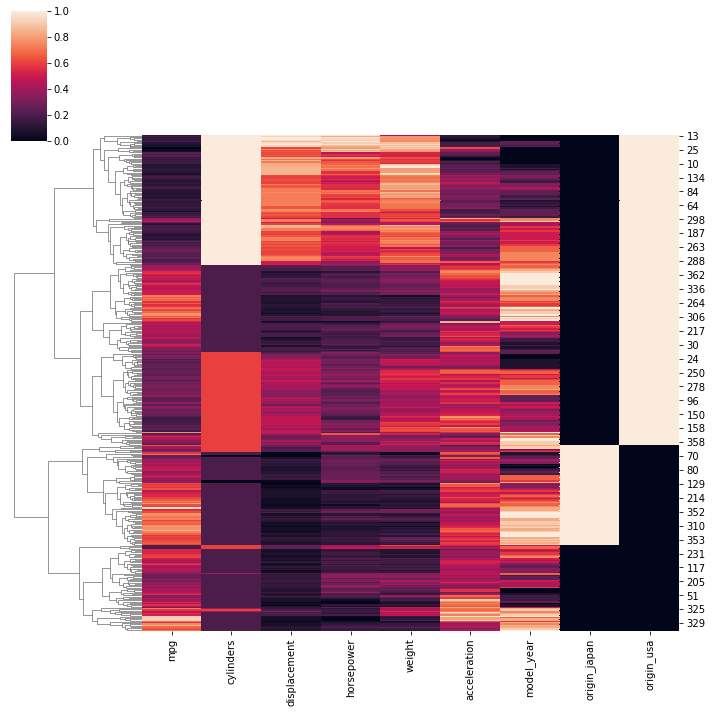

In [8]:
sbn.clustermap(scaler_df,col_cluster=False);

In [9]:
model=AgglomerativeClustering(n_clusters=4)
label=model.fit_predict(scaler_df)

In [10]:
df["label"]=label

<AxesSubplot:xlabel='mpg', ylabel='weight'>

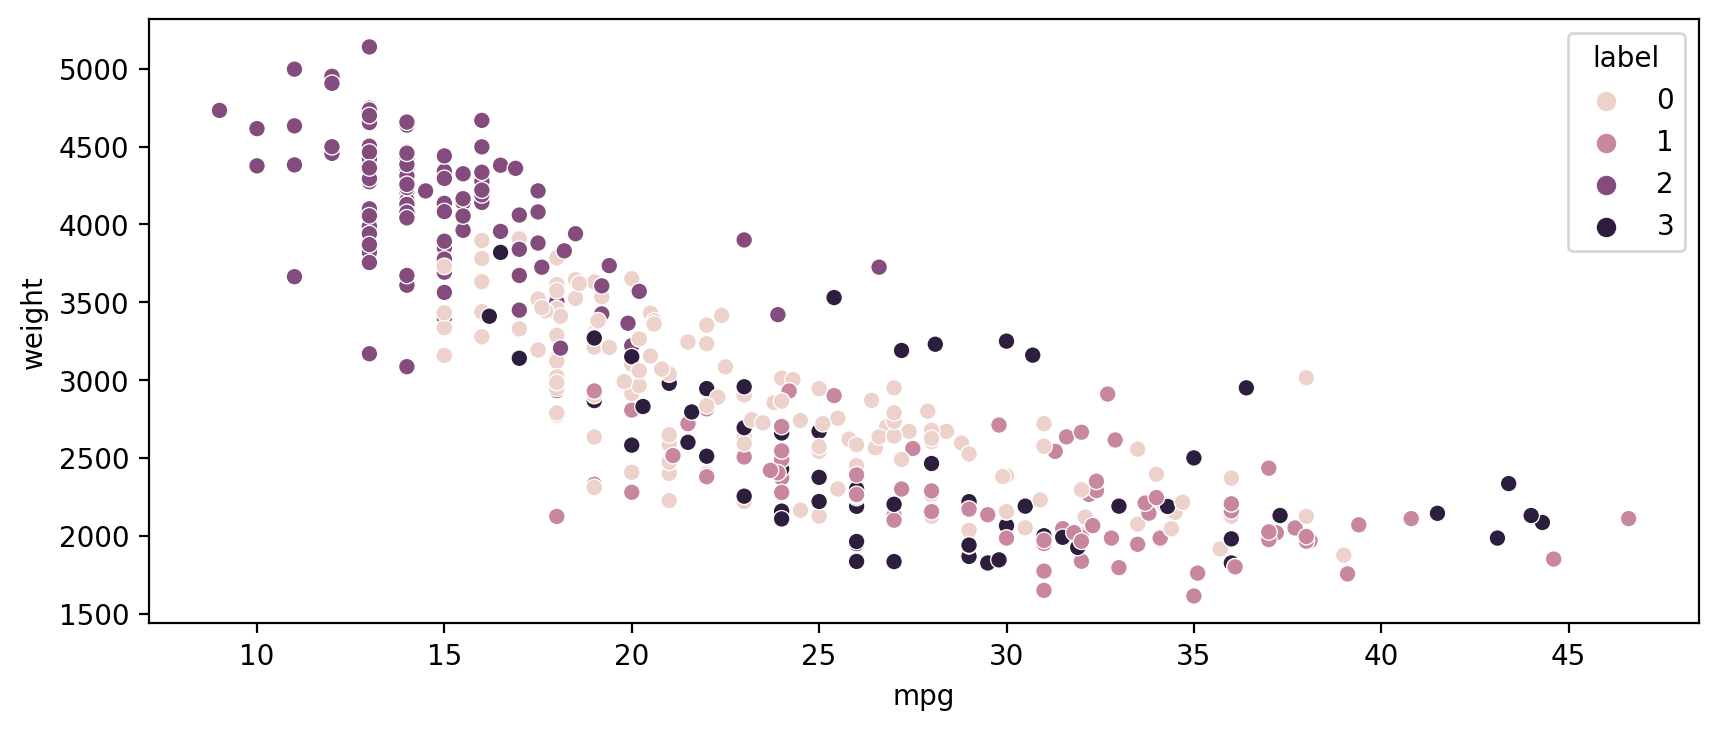

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sbn.scatterplot(x="mpg",y="weight",hue="label",data=df)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

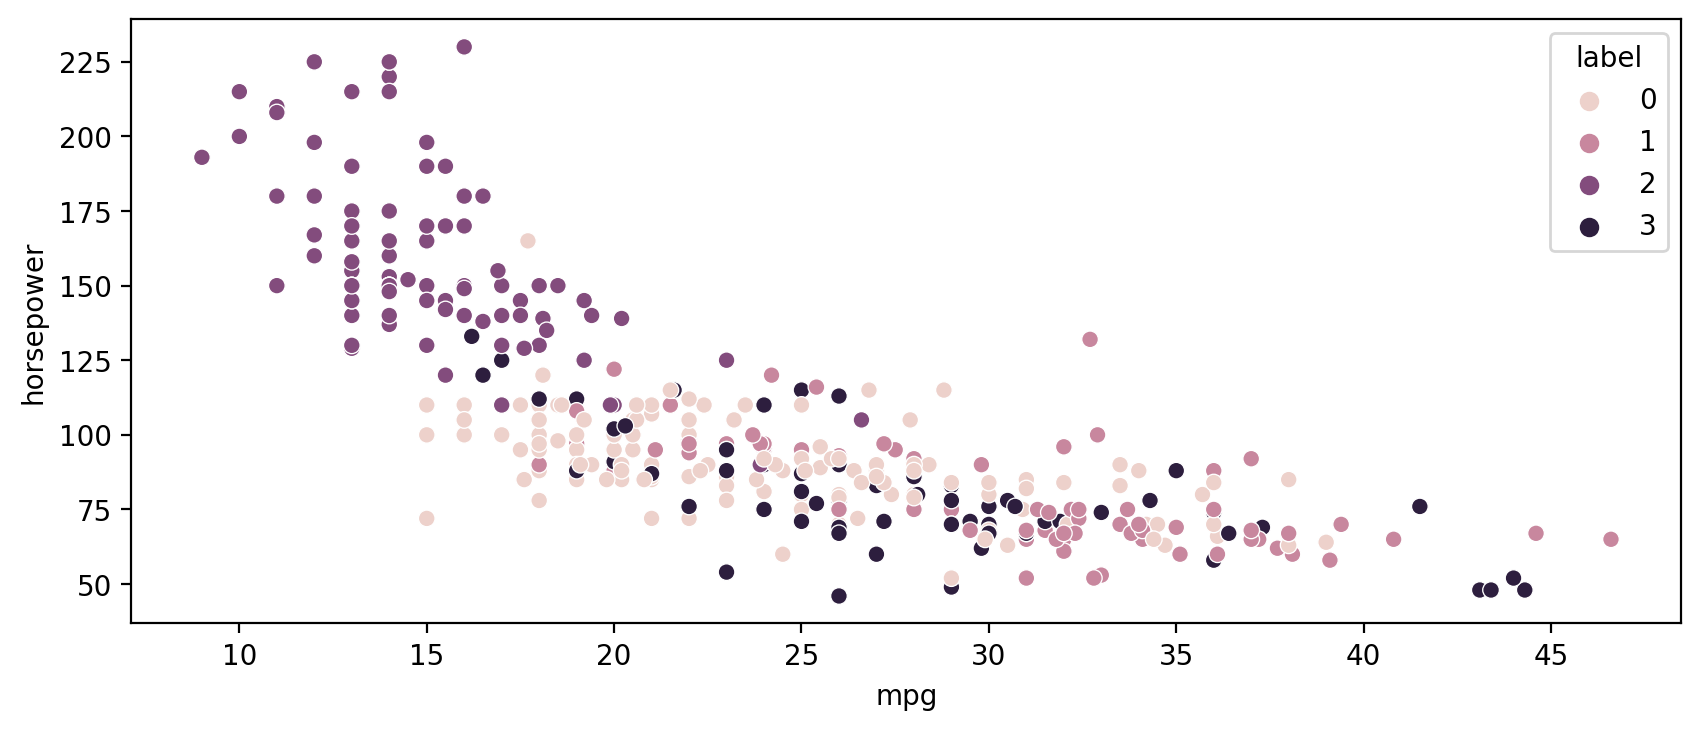

In [12]:
plt.figure(figsize=(10,4),dpi=200)
sbn.scatterplot(x="mpg",y="horsepower",hue="label",data=df)

In [13]:
np.sqrt(len(scaler_df.columns))   # max distance between to points

3.0

In [14]:
# distance_threshold : The linkage distance threshold above which, clusters will not be merged.
model=AgglomerativeClustering(n_clusters=None,distance_threshold=0) # 0 means each points will become cluster
label=model.fit_predict(scaler_df)
label

array([247, 252, 360, 302, 319, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 291, 310, 383,
       290, 205, 355, 275, 202, 289, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 243, 168, 378, 331, 201, 268, 256, 376,
       250, 197, 251, 371, 324, 230, 203, 261, 380, 187, 307, 389, 332,
       306, 236, 391, 350, 274, 288, 280, 231, 285, 100, 295, 210, 248,
       361, 390, 373, 266, 301, 369, 212, 357, 191, 313, 208, 228, 343,
       294, 379, 322, 321, 362, 188, 296, 374, 286, 125, 229, 244, 144,
       349, 359, 259, 213, 276, 215, 222, 204, 179, 287, 368, 387, 309,
       220, 216, 264, 260, 189, 340, 346, 143, 342, 227, 388, 370, 218,
       356, 327, 347, 278, 271, 258, 282, 318, 277, 123, 172, 382, 363,
       364, 195, 137, 249, 181, 262, 367, 186, 273, 138, 146, 255, 366,
       115, 385, 192, 372, 267, 233, 270, 263, 133, 165, 323, 198,  97,
       315, 269, 207, 147, 351, 134, 348,  98, 214,  48, 353, 17

In [15]:
linkage_matrix=hierarchy.linkage(model.children_)  #tell two cluster points, distance between , number of points
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

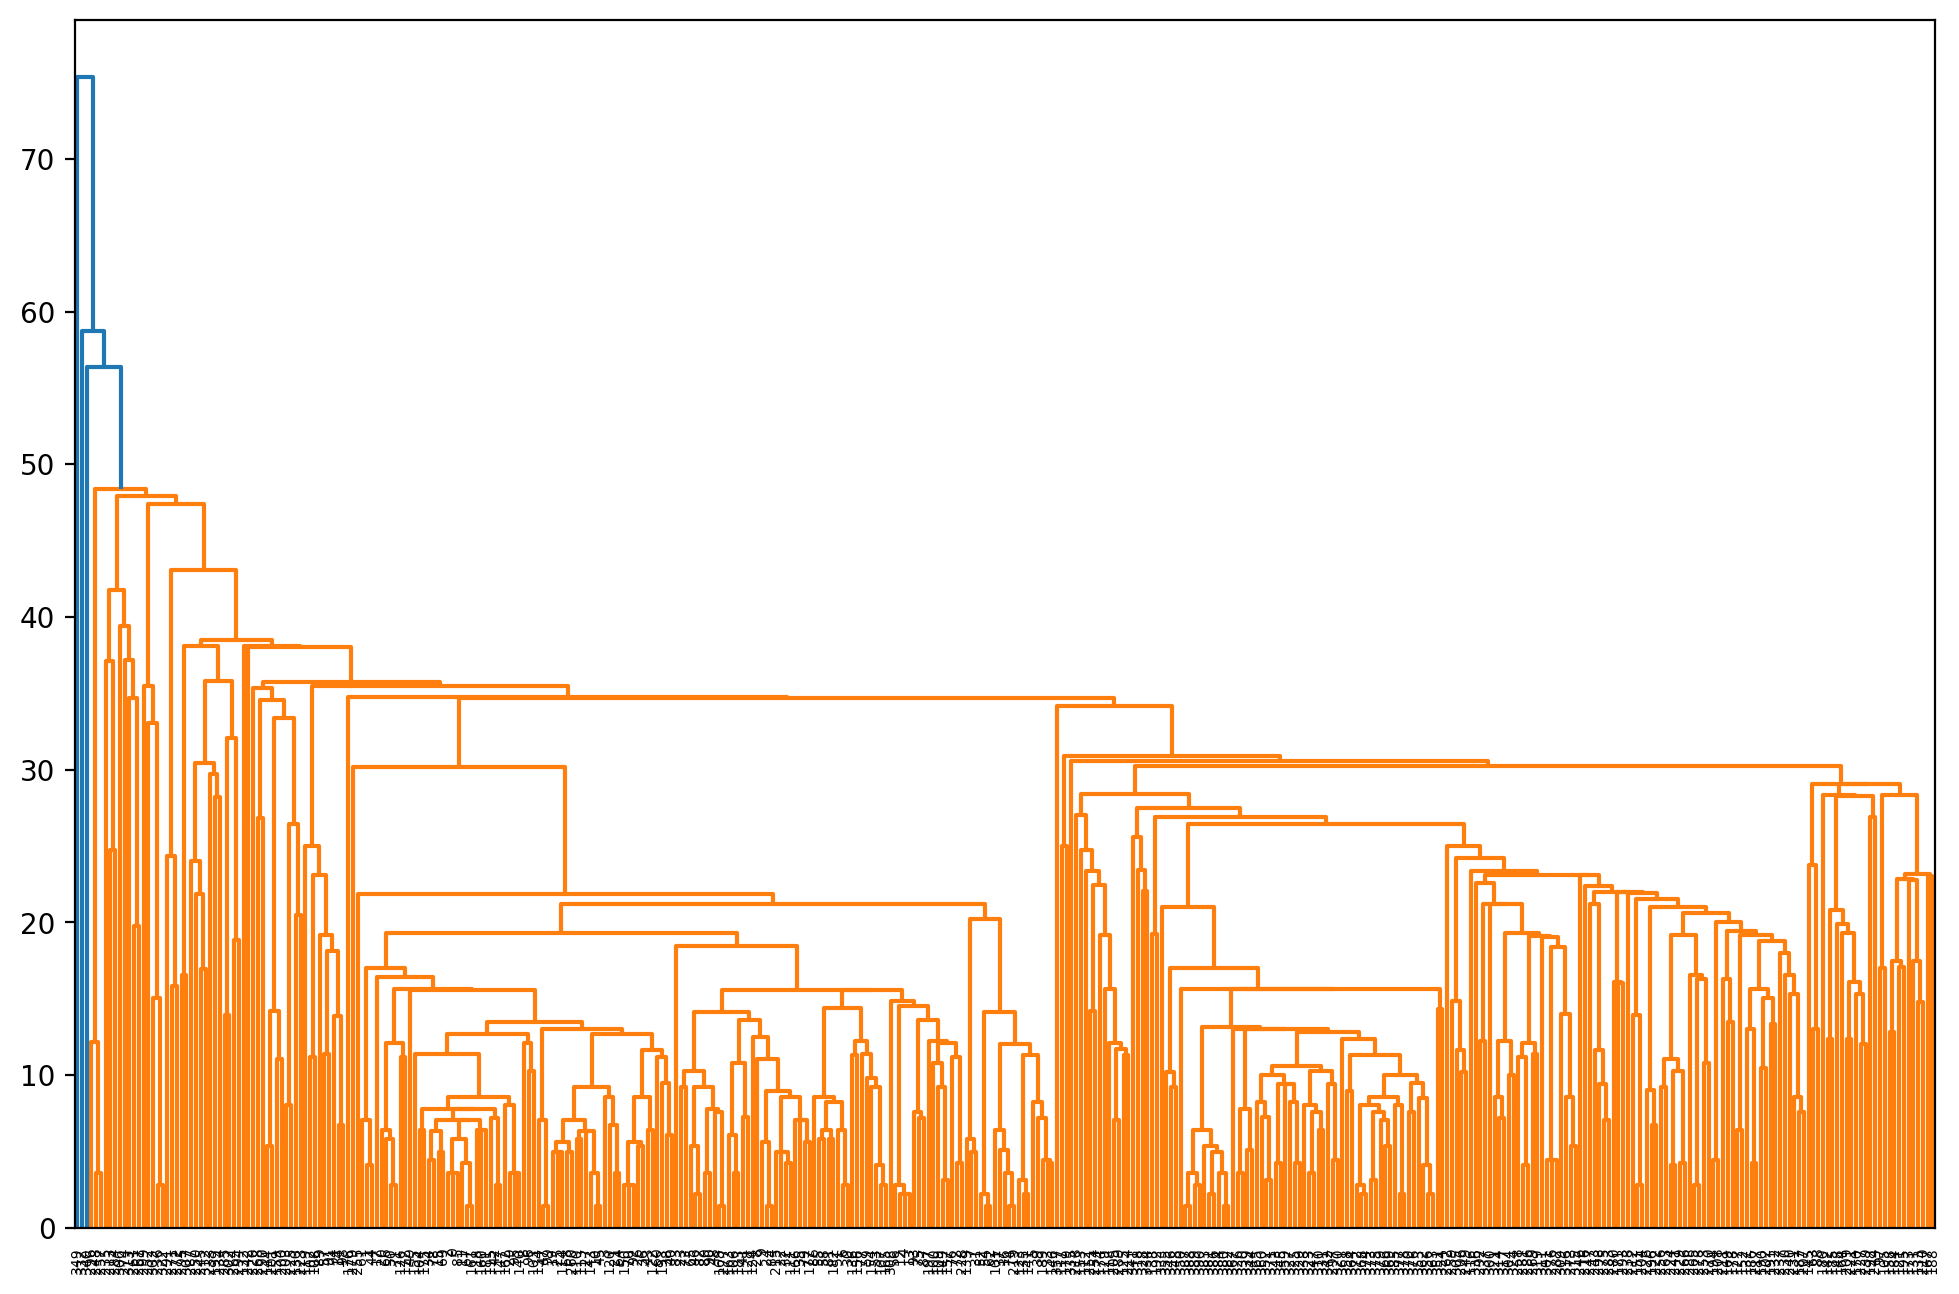

In [16]:
plt.figure(figsize=(12,8),dpi=200)
hierarchy.dendrogram(linkage_matrix);

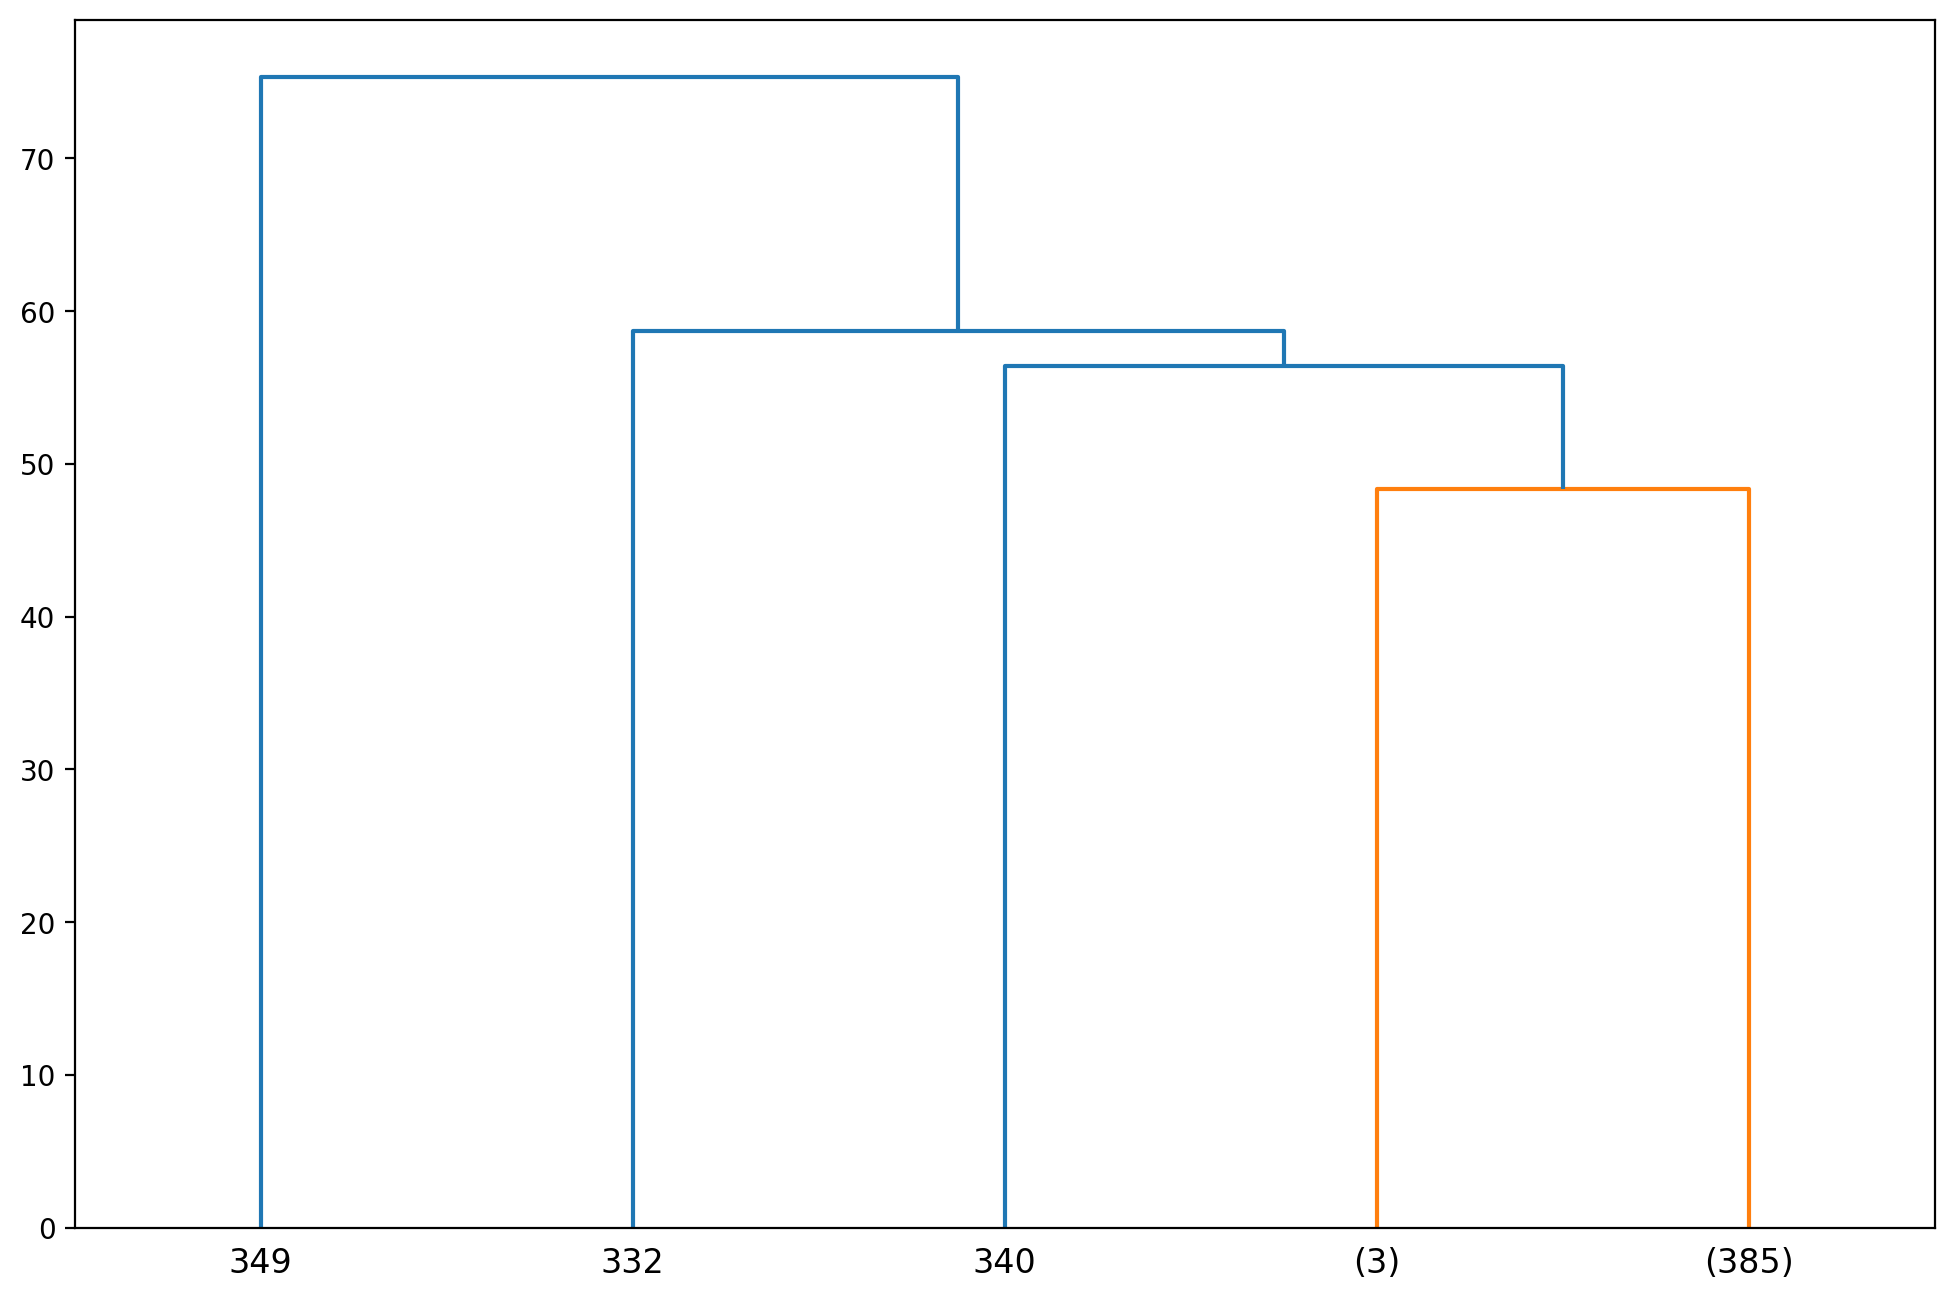

In [17]:
plt.figure(figsize=(12,8),dpi=200)
hierarchy.dendrogram(linkage_matrix,truncate_mode="lastp",p=5);

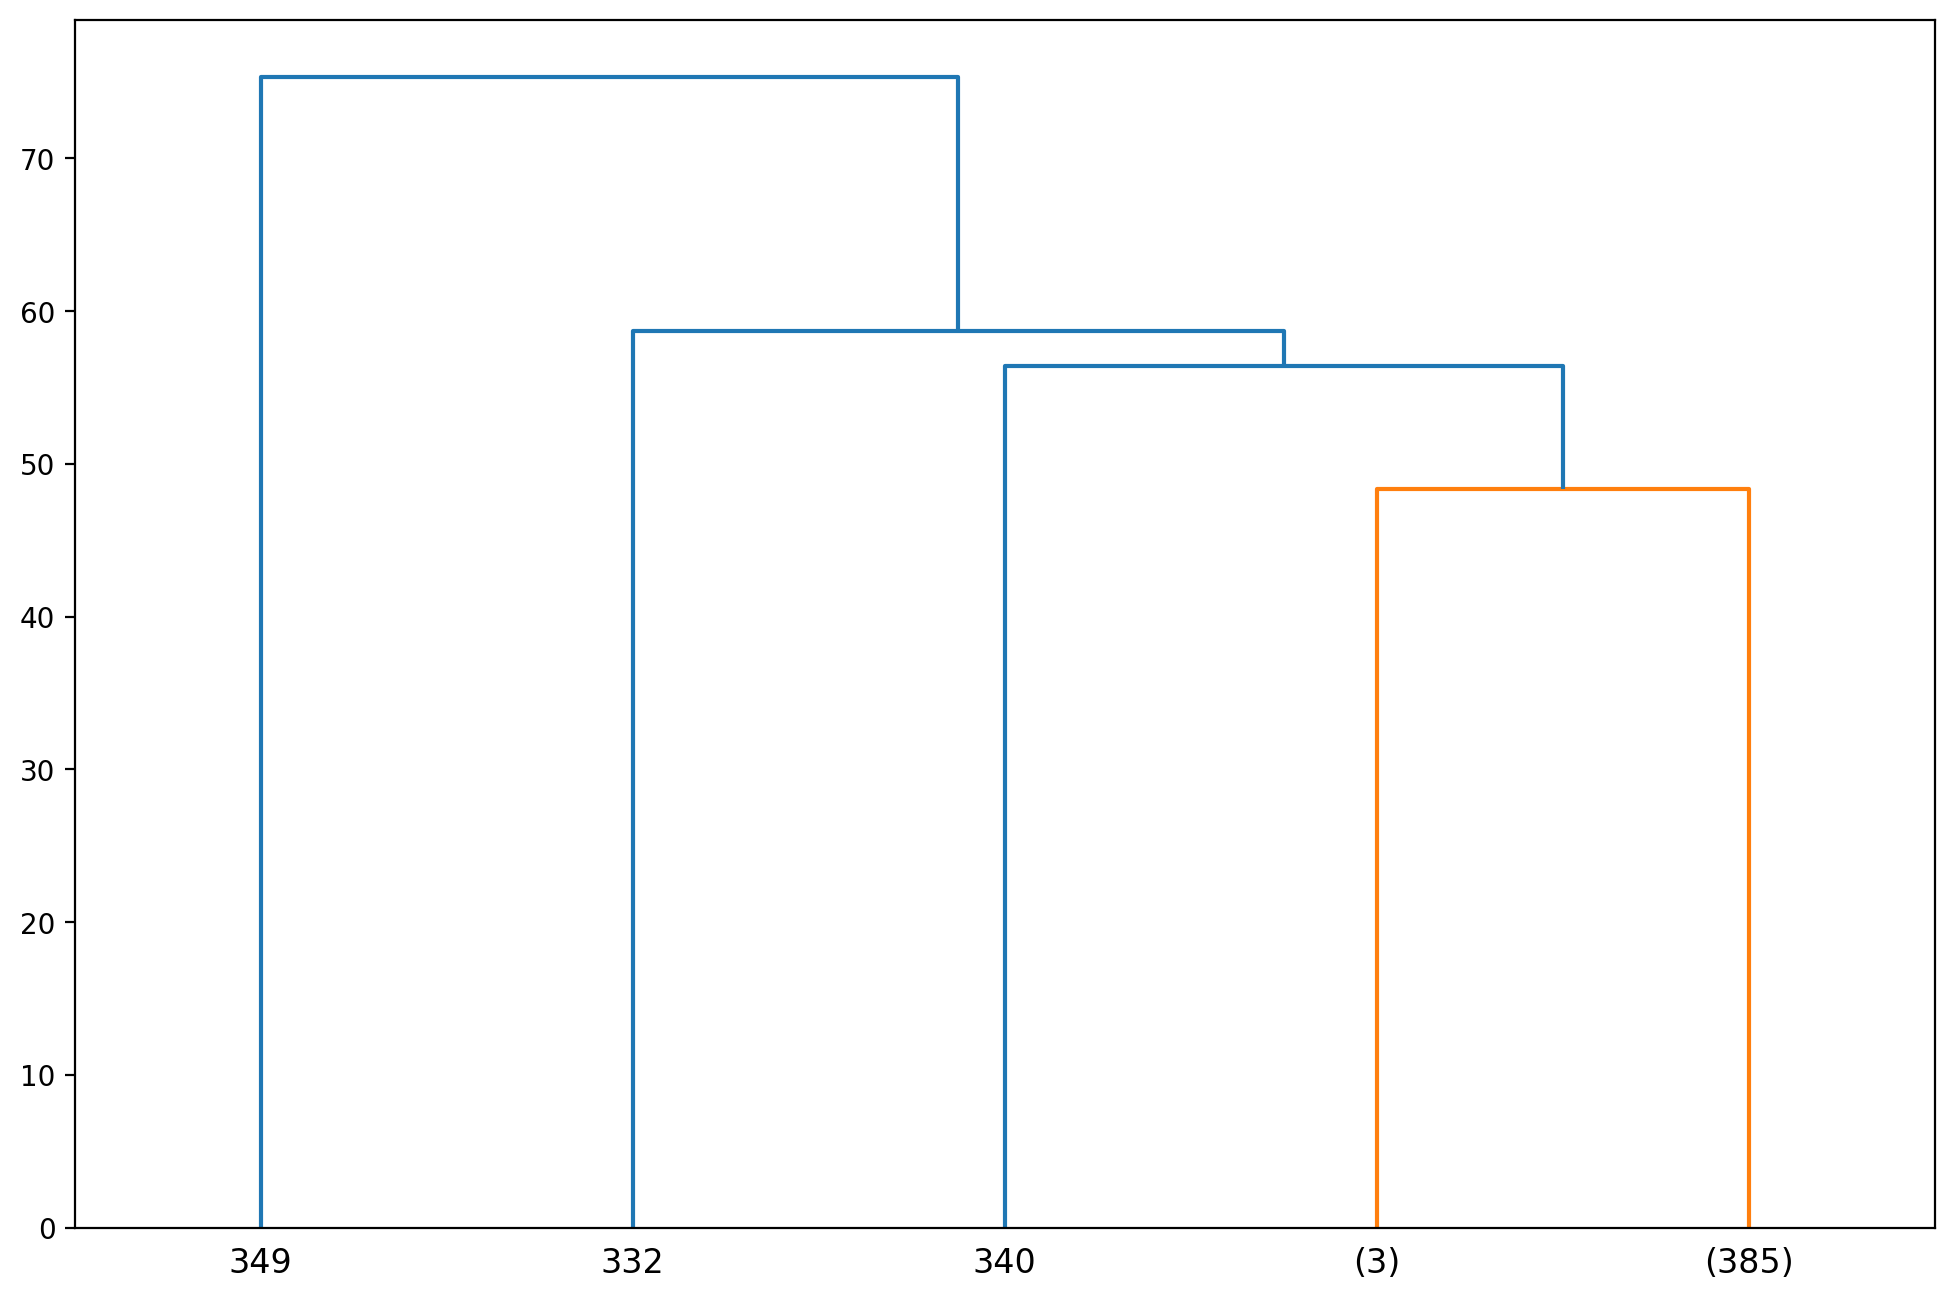

In [18]:
plt.figure(figsize=(12,8),dpi=200)
hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=3);

In [19]:
mpg_min=scaler_df["mpg"].min()
mpg_min

0.0

In [20]:
mpg_max=scaler_df["mpg"].max()
mpg_max

1.0000000000000002

In [21]:
max_index=scaler_df["mpg"].idxmax()
min_index=scaler_df["mpg"].idxmin()

In [22]:
#this is the longest distance b/w two points of mpg
distance=np.linalg.norm(scaler_df.iloc[max_index]-scaler_df.iloc[min_index])
distance

2.3852929970374714

In [23]:
# distance_threshold : The linkage distance threshold above which, clusters will not be merged.
model=AgglomerativeClustering(n_clusters=None,distance_threshold=1.5) # 0 means each points will become cluster
label=model.fit_predict(scaler_df)
label

array([ 3,  3,  3,  3,  3, 13, 13, 13, 13,  3,  3,  3,  3, 13, 12,  0,  0,
        0, 12,  1,  1,  1,  1,  1,  0,  3,  3,  3,  3, 12,  7, 12,  0,  0,
        0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  0,  7,  0,  0,  7,  1,  1,
        1,  8,  8,  1,  7, 12,  7,  1,  7,  7,  3,  3,  3,  3,  3, 13,  3,
        3,  3, 12,  3,  3,  3,  3,  1,  1,  1,  1,  7, 12, 12,  7, 12,  3,
        3,  3,  3,  3, 13,  3,  3,  3, 13, 13,  3,  0,  0,  0,  0,  0,  1,
        3,  3,  3,  3,  0, 12,  7, 12, 12,  7,  0,  1,  3, 13,  1,  1,  1,
        1,  3,  1, 10,  3,  0,  0,  0,  8,  7,  8,  7,  0,  0,  0,  3,  3,
        3,  3,  3,  1,  1,  1,  8,  8,  7,  1,  1, 12, 12,  1,  0,  0,  0,
        0,  2,  3,  3,  3,  0,  0,  0,  0,  0,  2,  2,  8,  7,  0,  7, 12,
        1, 12,  0,  1,  0, 11, 11, 11, 11,  8,  1,  1,  7,  7,  1,  2,  2,
        2,  2,  0,  0,  0,  0,  7,  7,  1,  8,  9,  0,  9,  0,  1,  8,  8,
        7, 11,  2, 14, 10, 11,  2,  2,  2,  2,  8,  4,  5,  7,  8,  2,  2,
        2,  2,  9,  9,  9

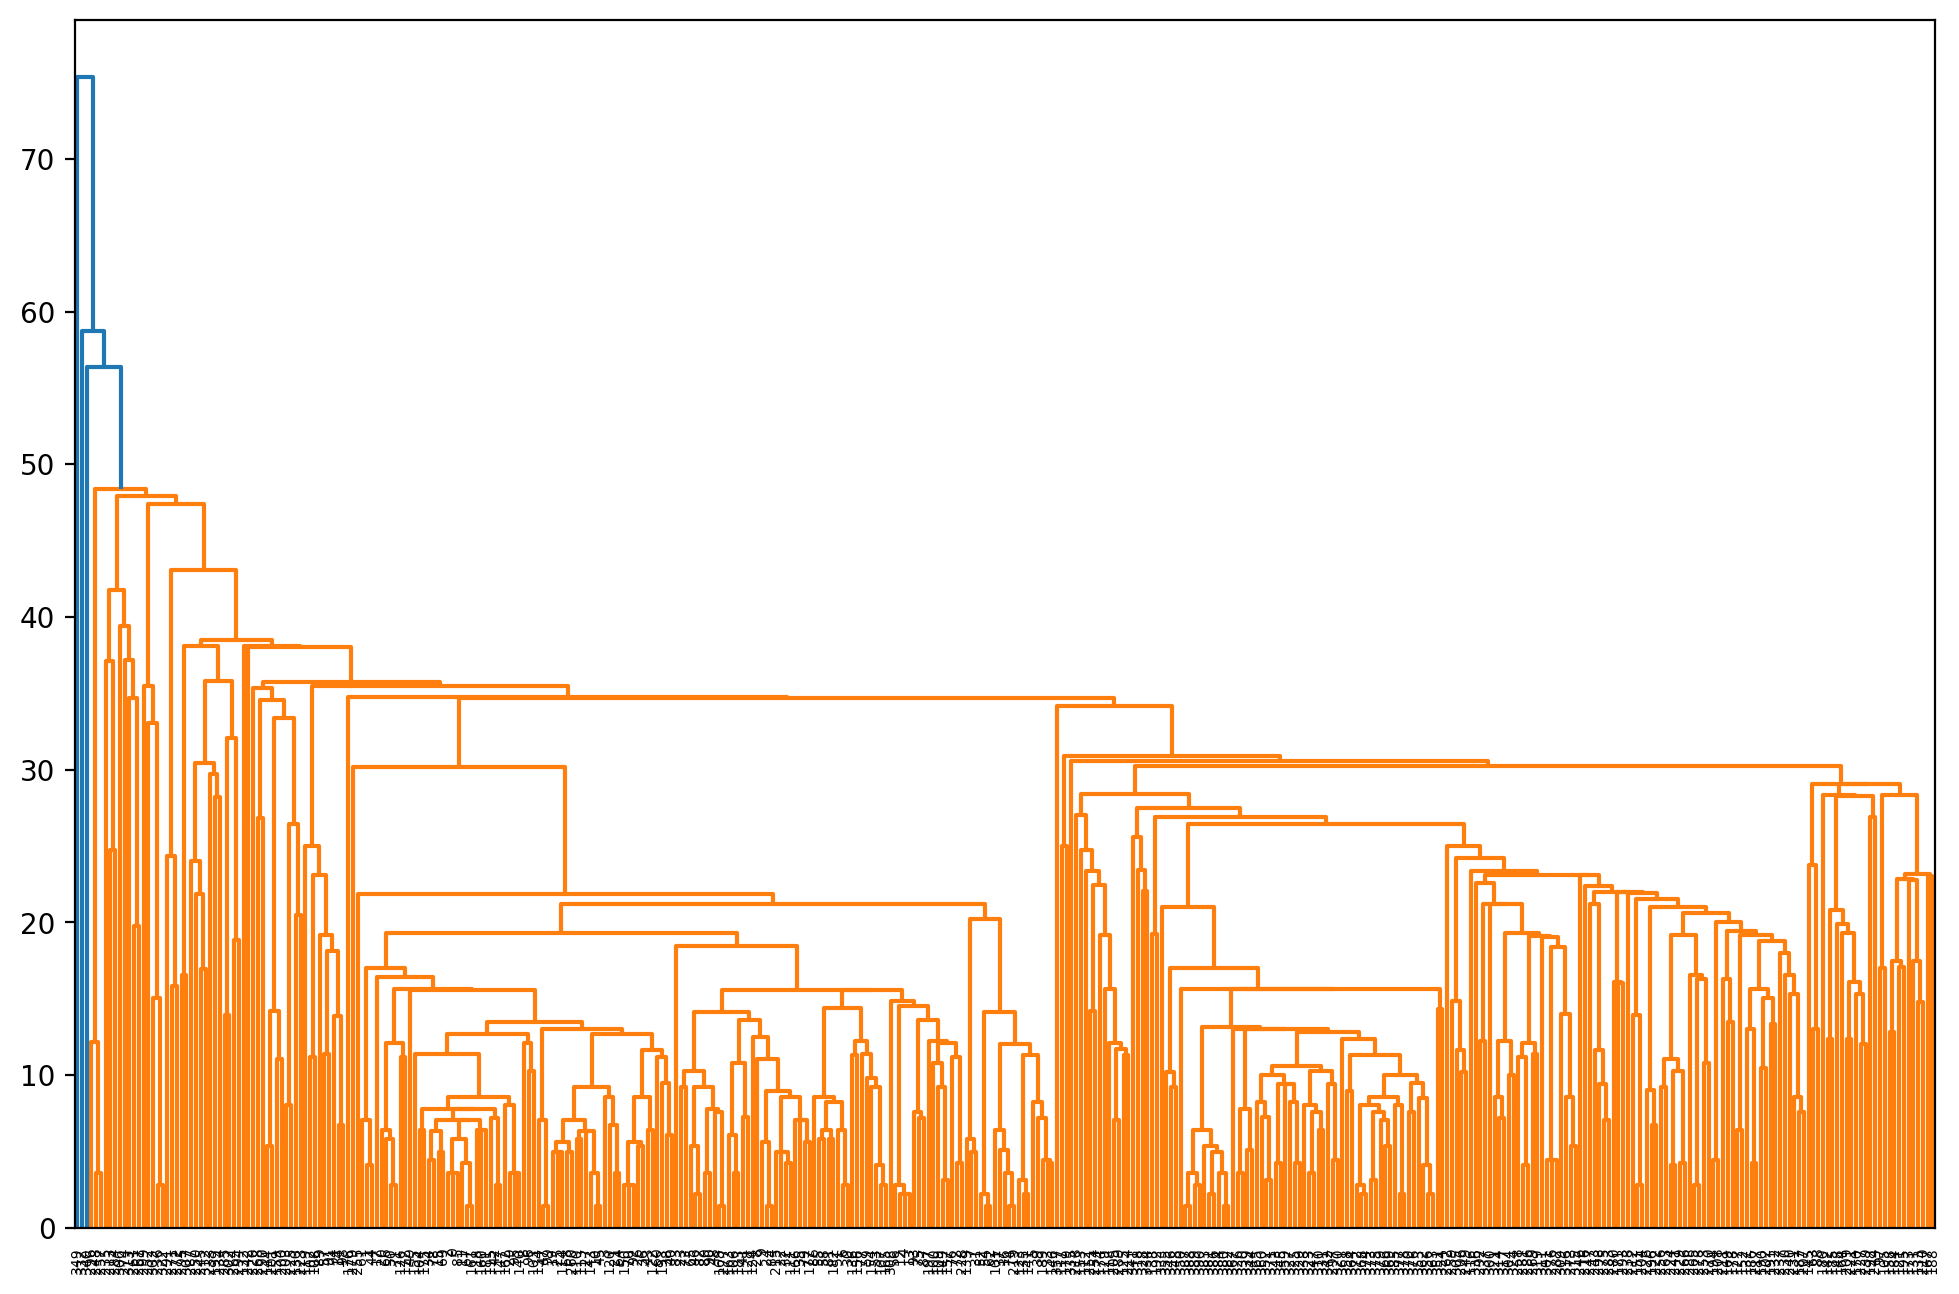

In [25]:
plt.figure(figsize=(12,8),dpi=200)
linkag=hierarchy.linkage(model.children_)
hierarchy.dendrogram(linkag);